# Import Essential Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler     ## Standardization Technique


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Warning Library
import warnings
warnings.filterwarnings("ignore")

# Read the Dataset

In [2]:
df = pd.read_csv("Churn_Prediction.csv")

In [3]:
# Display First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Shape of the dataset
df.shape

(10000, 14)

In [5]:
# Check Dtype and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Feature Engineering

# Data Cleaning

In [6]:
# Check Missing Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Check Duplicated Values
df.duplicated().sum()

0

# EDA (Exploratory Data Analysis)

In [9]:
# Drop irrelevant columns for analysis
df_clean = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [14]:
# Convert categorical columns to numeric for correlation
df_clean = pd.get_dummies(df_clean,columns = ['Geography','Gender'], drop_first=True)

In [15]:
df_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


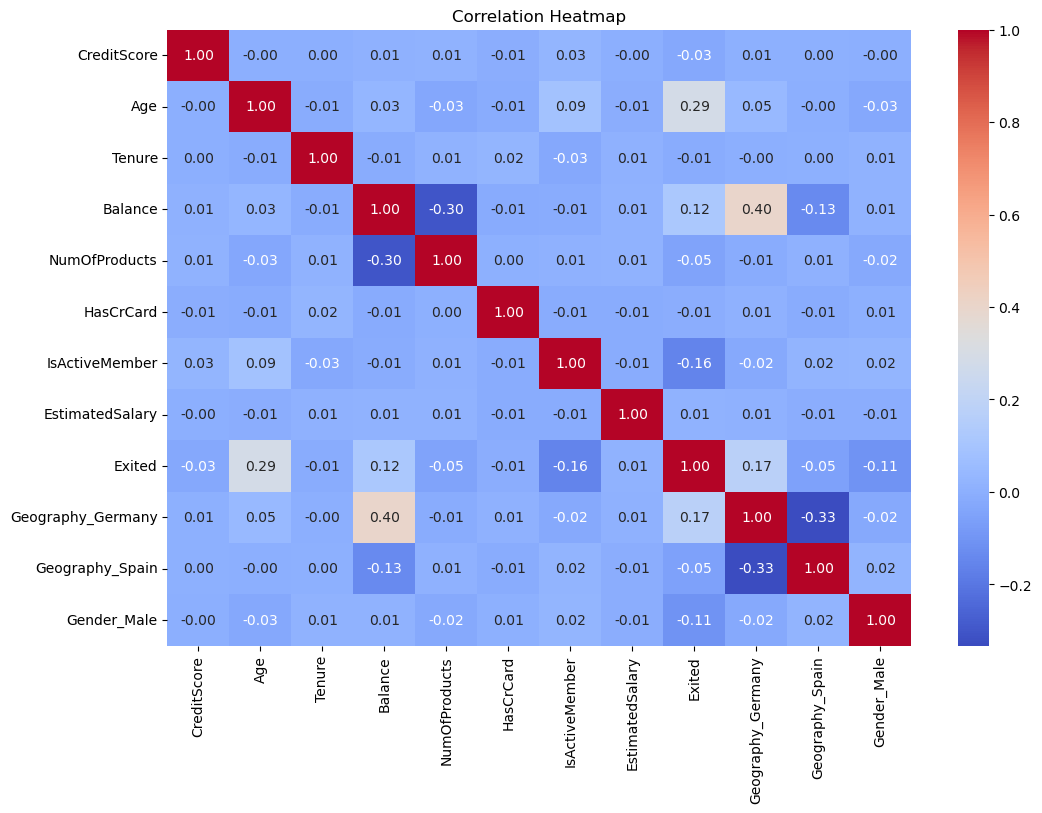

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,8))

sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.show()

# Check Distribution of the dataset

In [20]:
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

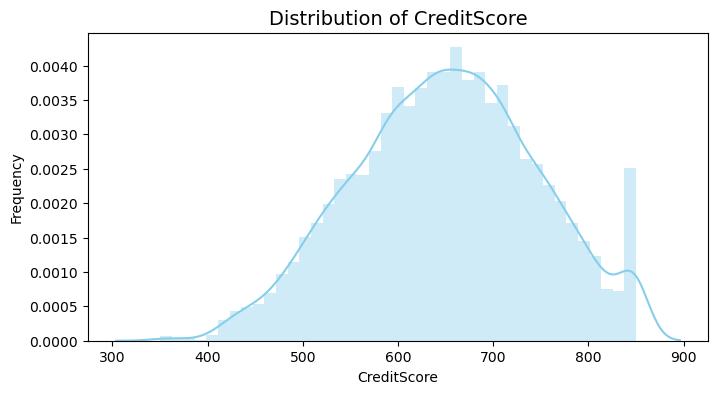

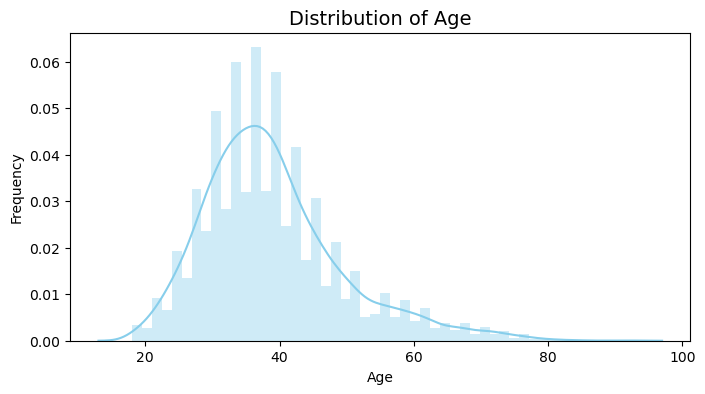

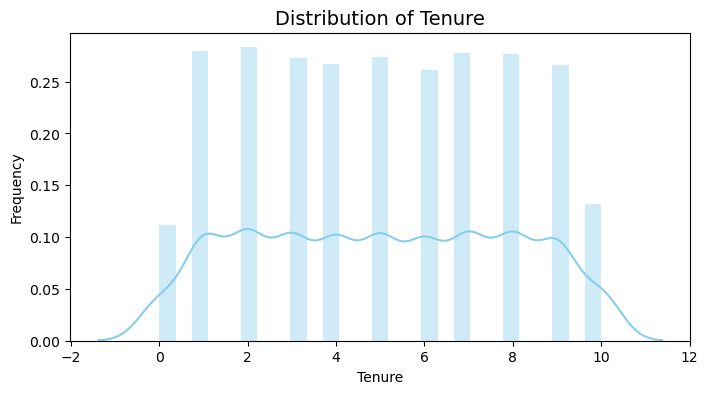

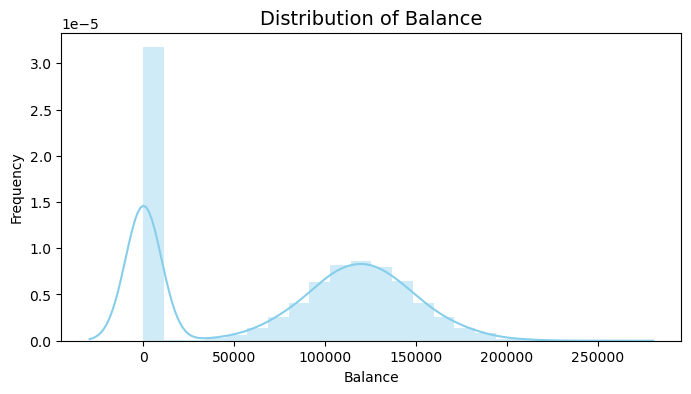

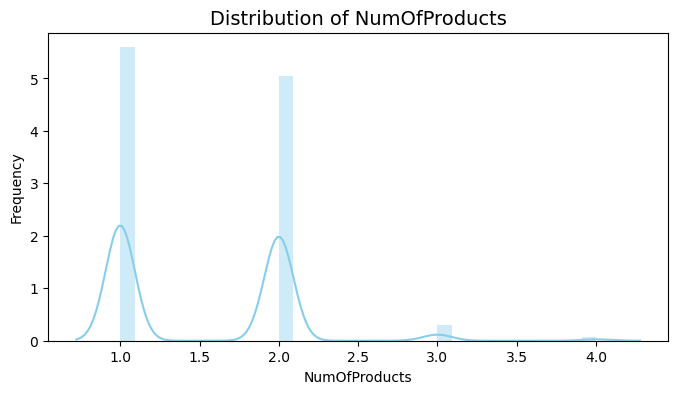

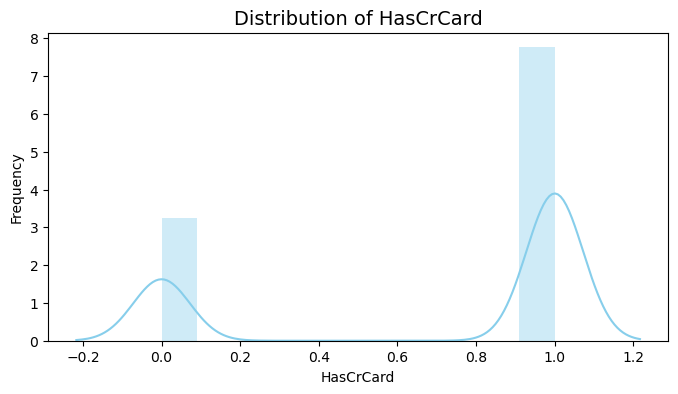

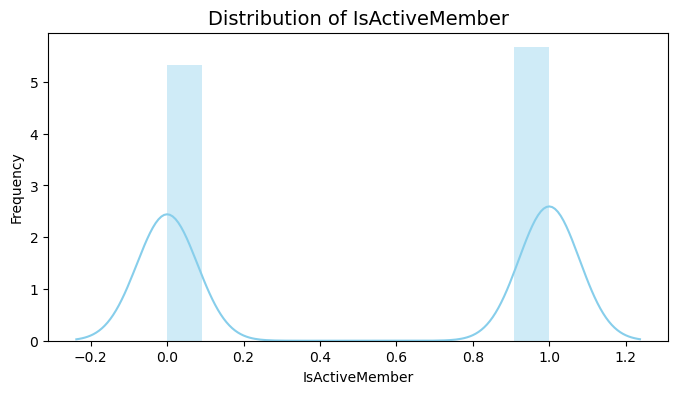

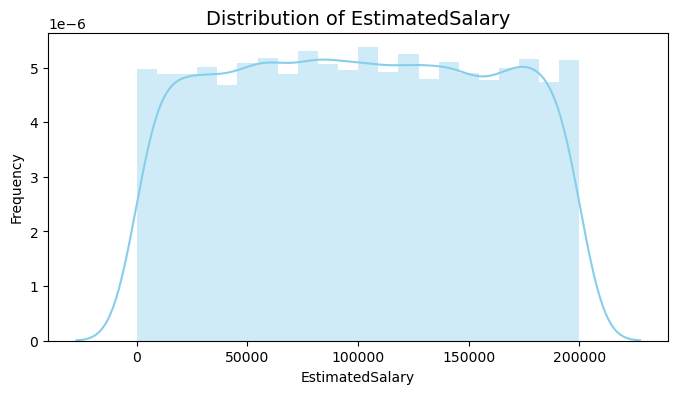

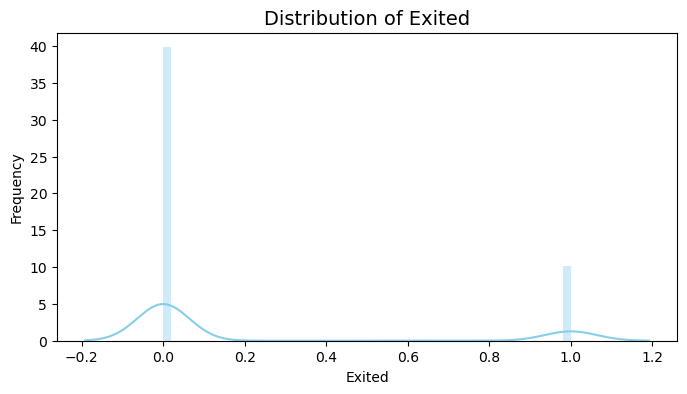

In [22]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Data Preprocessing

In [55]:
# Separate Independent and Dependent Variable
X = df_encoded.drop('Exited', axis=1)   
y = df_encoded['Exited']                

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame (for easy reading)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN Model

In [70]:
model = Sequential([
    Dense(3, activation = 'sigmoid',input_dim = 11),
    Dense(1, activation = 'sigmoid'),
    ])

In [71]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Import Adam Optimizer for gradient algorithms
from tensorflow.keras.optimizers import Adam

In [73]:
# Compile the model
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam')

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5294
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5071
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5054
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5089
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5123
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4945
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5111
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5115
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5097
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5098
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5077
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4973
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5003
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5006
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [74]:
# for Layer 1 weights and bias 
model.layers[0].get_weights()

[array([[-0.38139766,  0.01353724, -0.490342  ],
        [-0.08125971, -0.16530637,  0.04017431],
        [-0.4479745 , -0.6037452 , -0.3345518 ],
        [-0.12225929,  0.5473677 ,  0.3370428 ],
        [-0.36085838, -0.5179619 ,  0.54329276],
        [-0.40623027, -0.15045048, -0.10052145],
        [-0.23154245, -0.37047184,  0.09838383],
        [ 0.17862017,  0.11896652, -0.52253   ],
        [ 0.5921306 ,  0.2254129 ,  0.22973979],
        [ 0.39338347, -0.52756655,  0.30754712],
        [ 0.12287252,  0.3257238 ,  0.49134243]], dtype=float32),
 array([0.07883922, 0.02483083, 0.02907948], dtype=float32)]

In [75]:
# for layers 2 weights and bias
model.layers[1].get_weights()

[array([[-0.2961253 ],
        [-1.0282171 ],
        [-0.00144934]], dtype=float32),
 array([-0.10671047], dtype=float32)]

In [76]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [77]:
y_pred = np.where(y_log>0.5,1,0)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

# How can we Improve our accuracy score

In [66]:
# 1. Hidden Layer main Activation Function main 'Relu' rakho.
# 2. You can increase No of epochs e.g. 100 , 1000
# 3. You can increase no of nodes
# 4. You can increase no of hidden layer

In [93]:
model = Sequential([
    Dense(11, activation = 'relu',input_dim = 11),
    Dense(11, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    ])

In [94]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Compile the model
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [96]:
# Train the model
history = model.fit(X_train, y_train, epochs=200,validation_split = 0.2)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7282 - loss: 2882.5698 - val_accuracy: 0.7394 - val_loss: 6.9804
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7015 - loss: 5.2561 - val_accuracy: 0.7181 - val_loss: 1.2478
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7387 - loss: 2.3080 - val_accuracy: 0.7912 - val_loss: 3.1385
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7396 - loss: 2.3879 - val_accuracy: 0.7962 - val_loss: 2.1369
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7381 - loss: 2.3161 - val_accuracy: 0.7987 - val_loss: 0.5421
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.5554 - val_accuracy: 0.7987 - val_loss: 0.5556
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7955 - loss: 0.5705 - val_accuracy: 0.7987 - val_loss: 0.5341
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7983 - loss: 0.5449 - val_a

In [97]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [98]:
y_pred = np.where(y_log>0.5,1,0)

In [99]:
accuracy_score(y_test,y_pred)

0.8035